In [24]:
# キャッシュのデータをpandasであれこれする
from datetime import datetime
import pandas as pd
import numpy as np
import pymongo
import json
import os
import sys
import time
import copy
import re
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
import sys
import codecs
from janome.tokenizer import Tokenizer

# 形態素解析のセッティング
t = Tokenizer()

# グラフの出力を日本語に指定する。
font = {'family' : 'TakaoGothic'}
matplotlib.rc('font', **font)

# MongoDBの立ち上げ
os.system('sudo service mongod start')

# MongoDBの仮想環境への接続
client = pymongo.MongoClient()
automata_db = client['PretaAutomata']
add_a = automata_db['AddPretaAutomata']

# 取得したい日時のログを収録する。
dt = datetime(2015, 4, 1, 12, 30, 59, 0).timestamp()
d = add_a.find({'meta.timestamp': {'$gte': dt}})

talk_list = list()  # 発言データが色々投げ込まれるゴミ箱

In [25]:
for v in d:
    wolf_list = [player for player in v['player'] if player['role'] == '人狼']
    # COパターンの作成
    print([pl for pl in wolf_list])
    seer = len([pl for pl in wolf_list if pl['virtual_role'] == '占い師'])
    mid = len([pl for pl in wolf_list if pl['virtual_role'] == '霊能者'])
    co_pattern = '%d-%d' % (seer, mid)
    append_data = (co_pattern, v['meta']['victory'])
    # 勝利役職の挿入
    talk_list.append(append_data)  # もはやtalk_listではない

print(talk_list)

[{'virtual_role': '村人', 'role': '人狼', 'name': '理想郷', 'trip': 'フレキシブル◆LUCKghU4as'}, {'virtual_role': '占い師', 'role': '人狼', 'name': 'ふたつの心', 'trip': 'レイ◆QX0YhAxGPL'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'ホワイトホール', 'trip': '輪っかっか◆p4IriRYQ76'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': '病', 'trip': 'アォンJ◆pXYsunofYu'}, {'virtual_role': '占い師', 'role': '人狼', 'name': '魔獣先輩', 'trip': 'ほなまた◆exe8VCavBe'}, {'virtual_role': '村人', 'role': '人狼', 'name': '三重殺', 'trip': 'abyss◆utC8CuP2dE'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': '東天青騎士ゲオルグ', 'trip': '超にわかJ民◆jENvnNRDVQ'}, {'virtual_role': '占い師', 'role': '人狼', 'name': 'ヴァネッサ', 'trip': 'おおいしこいし◆sLIbnNUlkA'}]
[{'virtual_role': '占い師', 'role': '人狼', 'name': 'キノト', 'trip': 'かしこ◆pfQxgXzRhm'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'レイナ', 'trip': 'かもみーる◆3AieC-xtx6'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'ソウザブロウ', 'trip': 'モンキー◆wNi4UmnTlP'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': 'まだ見ぬ夢', 'trip': '青紫◆F6v5etpTVP'}, {'virtua

[{'virtual_role': '占い師', 'role': '人狼', 'name': 'ロシアンブルー', 'trip': 'クーベル◆UQlA7i23RI'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'コナカルチャー', 'trip': '輪っかっか◆p4IriRYQ76'}, {'virtual_role': '村人', 'role': '人狼', 'name': '噴水', 'trip': '天使の囀り◆5rI-BH5LD3'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': '裏の世界', 'trip': 'せれくと◆d0v4kfPT5J'}, {'virtual_role': '占い師', 'role': '人狼', 'name': '寝癖知らず', 'trip': 'dee◆8x8vToix9M'}, {'virtual_role': '占い師', 'role': '人狼', 'name': '瞬ドル凡', 'trip': 'ぱーつ◆6iGEHacOZA'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': 'フミノエ', 'trip': '夜の三冠王◆iYqZL.Ivhn'}, {'virtual_role': '占い師', 'role': '人狼', 'name': 'メディスン', 'trip': 'ふくずみ◆rcIbSotrL4'}, {'virtual_role': '霊能者', 'role': '人狼', 'name': '墓守アレクシス', 'trip': 'wbc◆1Cf6nTnzDw'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': 'ダミアン', 'trip': '迷迭香◆gdyb21LQTc'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'まだ泳げないお', 'trip': 'やこ◆JQYJjt1NG9'}, {'virtual_role': '村人', 'role': '人狼', 'name': '赤いたぬき', 'trip': 'クスラ◆Yc5t6Al49K'}]
[{'virtual

[{'virtual_role': '霊能者', 'role': '人狼', 'name': '聖戦士Ｌ５', 'trip': 'おまえは今まで食ったパンの枚数をおぼえているのか？◆MlsdGbkngT'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'スリープモード', 'trip': 'Tokyo Drift◆iNWTFuEC92'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'ロザリオ', 'trip': 'トキノ◆AquTTod4iI'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': '精神科医師', 'trip': 'Sing◆yujRTt0CXn'}, {'virtual_role': '占い師', 'role': '人狼', 'name': 'シシカバブ－', 'trip': 'yoyu◆7FYN.5qvh0'}, {'virtual_role': '村人', 'role': '人狼', 'name': '都こんぶ', 'trip': 'あいや◆cvdr4cOJTe'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': 'MVP', 'trip': 'OCHO◆9oOMkVTUB7'}, {'virtual_role': '村人', 'role': '人狼', 'name': '大沢たかお', 'trip': '視点漏れに自信◆utgoN9IpOf'}, {'virtual_role': '村人', 'role': '人狼', 'name': '唐澤貴洋', 'trip': 'けんもー◆VWW22wefWZ'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': 'ウィス', 'trip': 'うんち◆LepgQvoYBm'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'ゆかりひめ', 'trip': 'うさみ◆Eod.Z1tg77'}, {'virtual_role': '村人', 'role': '人狼', 'name': '大貧民', 'trip': '電波系◆xi2t

[{'virtual_role': '村人', 'role': '人狼', 'name': 'ふかふか', 'trip': 'てえも大尉◆PjylHxnBsn'}, {'virtual_role': '占い師', 'role': '人狼', 'name': 'アマリリス', 'trip': 'アン◆BnQnK6wHFf'}, {'virtual_role': '村人', 'role': '人狼', 'name': '侍祭サマリア', 'trip': '木曾◆8t7WdO3fYN'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': 'サミドリ', 'trip': 'ゼラリン◆0Fx8BWeZuv'}, {'virtual_role': '村人', 'role': '人狼', 'name': '前後不覚', 'trip': '雪もぐ◆3uHSdtKSFC'}, {'virtual_role': '占い師', 'role': '人狼', 'name': 'ホルスタイン', 'trip': 'ちぇる◆Blr2C2sezn'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': '鶯丸', 'trip': 'ROU◆q50clUBkpr'}, {'virtual_role': '村人', 'role': '人狼', 'name': '次郎太刀', 'trip': 'mame◆Bl2BJ3JmDt'}, {'virtual_role': '村人', 'role': '人狼', 'name': '鯰尾藤四郎', 'trip': 'さいら◆4HQJf1dYO3'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': '色眼鏡', 'trip': '抹茶◆roavD6YobT'}, {'virtual_role': '占い師', 'role': '人狼', 'name': '犬屋敷', 'trip': 'うん○まん○ちん○◆PkPk2cvjrh'}, {'virtual_role': '村人', 'role': '人狼', 'name': '王子様', 'trip': '百騎兵◆nNDdfcAOAh'}]
[{'virtual_role': '村人', '

[{'virtual_role': '村人', 'role': '人狼', 'name': 'すばやさのもと', 'trip': 'お屋敷◆LY94.4kZKj'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'カルマ', 'trip': 'sea*◆2r-uPhQkP4'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'ブレイクダウン', 'trip': 'Juliette.C◆5YMJUnsCy3'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': 'めにえる', 'trip': '徐◆b1fg7oT0jB'}, {'virtual_role': '村人', 'role': '人狼', 'name': '羆', 'trip': 'みっく◆hpcGfqo57X'}, {'virtual_role': '村人', 'role': '人狼', 'name': '狼人ホーム', 'trip': 'フーフーしてやってもいいけど◆ogVGVGI-KD'}]
[{'virtual_role': '村人', 'role': '人狼', 'name': '便乗殺人黒鉄鼠', 'trip': 'ちゃあ◆J2xPimfROn'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'アリス', 'trip': '道民陣営◆Nvt6rVlQsu'}, {'virtual_role': '村人', 'role': '人狼', 'name': 'ギガドレイン', 'trip': 'Type0◆Lu4rmMxgi7'}]
[{'virtual_role': '占い師', 'role': '人狼', 'name': 'Fire', 'trip': 'レイ◆QX0YhAxGPL'}, {'virtual_role': '村人', 'role': '人狼', 'name': '衛星放送', 'trip': 'クスラ◆Yc5t6Al49K'}, {'virtual_role': '村人', 'role': '人狼', 'name': '萌え豚', 'trip': 'HTK◆NITRo1Be1f'}]
[{'virtual

In [27]:
df = pd.DataFrame(talk_list, columns=('pattern', 'win_role'))

In [28]:
df

,pattern,win_role
0,1-0,draw
1,1-0,vill
2,1-0,vill
3,1-0,fox
4,0-0,wolf
5,1-0,wolf
6,1-0,vill
7,1-0,vill
8,0-0,vill
9,0-0,wolf


In [30]:
df.apply(pd.value_counts)

,pattern,win_role
0-0,938.0,NaN
0-1,106.0,NaN
0-2,7.0,NaN
1-0,1011.0,NaN
1-1,71.0,NaN
1-2,2.0,NaN
2-0,36.0,NaN
2-1,1.0,NaN
del,NaN,115.0
draw,NaN,143.0


In [31]:
df['pattern'].value_counts()

1-0    1011
0-0     938
0-1     106
1-1      71
2-0      36
0-2       7
1-2       2
2-1       1
Name: pattern, dtype: int64

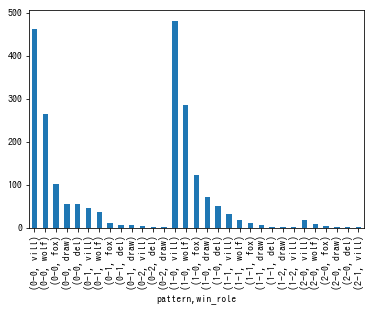

In [55]:
df.groupby('pattern')['win_role'].value_counts().plot(kind='bar')
plt.show()

In [57]:
df.groupby('pattern')['win_role'].value_counts(normalize=True)

pattern  win_role
0-0      vill        0.492537
         wolf        0.281450
         fox         0.107676
         draw        0.059701
         del         0.058635
0-1      vill        0.433962
         wolf        0.349057
         fox         0.103774
         del         0.056604
         draw        0.056604
0-2      vill        0.714286
         del         0.142857
         draw        0.142857
1-0      vill        0.475767
         wolf        0.282888
         fox         0.121662
         draw        0.070227
         del         0.049456
1-1      vill        0.464789
         wolf        0.267606
         fox         0.154930
         draw        0.084507
         del         0.028169
1-2      draw        0.500000
         vill        0.500000
2-0      vill        0.527778
         wolf        0.250000
         fox         0.138889
         draw        0.055556
         del         0.027778
2-1      vill        1.000000
Name: win_role, dtype: float64

In [58]:
df.groupby('pattern')['win_role'].value_counts()

pattern  win_role
0-0      vill        462
         wolf        264
         fox         101
         draw         56
         del          55
0-1      vill         46
         wolf         37
         fox          11
         del           6
         draw          6
0-2      vill          5
         del           1
         draw          1
1-0      vill        481
         wolf        286
         fox         123
         draw         71
         del          50
1-1      vill         33
         wolf         19
         fox          11
         draw          6
         del           2
1-2      draw          1
         vill          1
2-0      vill         19
         wolf          9
         fox           5
         draw          2
         del           1
2-1      vill          1
Name: win_role, dtype: int64